In [2]:
pip install openpyxl


     ------------------------------------ 250.9/250.9 kB 592.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#loading the data

import pandas as pd

# Load the data
followers_df = pd.read_csv(r'C:\Users\Sukanya Rane\OneDrive\Desktop\following.csv')
comments_df = pd.read_excel(r'C:\Users\Sukanya Rane\OneDrive\Desktop\comments.xlsx')


In [4]:
print(followers_df.head())
print(comments_df.head())


       User Id            Username         Fullname Followed by you   
0   9289674501  saish_shirodkar_18  Saish Shirodkar             YES  \
1  54829496337     anushka_naik611     Anushka Naik             YES   
2   6894047463        _siya.desai_       Siya Desai             YES   
3  54319127760  notsochill_sukanya     Sukanya Rane             YES   
4   2032040349    simrannadkarni10  Simran Nadkarni             YES   

  Is verified                                   Profile URL   
0          NO  https://www.instagram.com/saish_shirodkar_18  \
1          NO     https://www.instagram.com/anushka_naik611   
2          NO        https://www.instagram.com/_siya.desai_   
3          NO  https://www.instagram.com/notsochill_sukanya   
4          NO    https://www.instagram.com/simrannadkarni10   

                                          Avatar URL  
0  https://instagram.fpnq13-4.fna.fbcdn.net/v/t51...  
1  https://instagram.fudr1-1.fna.fbcdn.net/v/t51....  
2  https://instagram.fpnq13-2

In [7]:
import pandas as pd

# Load the data
followers_df = pd.read_csv(r'C:\Users\Sukanya Rane\OneDrive\Desktop\following.csv')
comments_df = pd.read_excel(r'C:\Users\Sukanya Rane\OneDrive\Desktop\comments.xlsx')

# Strip extra spaces from column names if necessary
followers_df.columns = followers_df.columns.str.strip()
comments_df.columns = comments_df.columns.str.strip()

# Check column names to confirm
print(followers_df.columns)
print(comments_df.columns)


Index(['User Id', 'Username', 'Fullname', 'Followed by you', 'Is verified',
       'Profile URL', 'Avatar URL'],
      dtype='object')
Index(['User Id', 'Username', 'Comment Id', 'Comment Text', 'Profile URL',
       'Avatar URL', 'Date'],
      dtype='object')


In [8]:
#Merge the Datasets
#Ensure that you use the correct column names. In your case, it seems to be "User Id".


# Merge the datasets on 'User Id'
merged_df = pd.merge(comments_df, followers_df, left_on='User Id', right_on='User Id', how='left')

# Verify the merge
print(merged_df.head())


       User Id       Username_x         Comment Id   Comment Text   
0  48879586885       sneha.k.03  18039031007018900  informative 💯  \
1   6894047463     _siya.desai_  18087955069482000              💡   
2  54829496337  anushka_naik611  18104025802422700           Bulb   
3  51753964037        shlok._.z  18055107259778800              🔥   
4  68886852748        srane8705  17957283464804800         ❤️❤️❤️   

                               Profile URL_x   
0       https://www.instagram.com/sneha.k.03  \
1     https://www.instagram.com/_siya.desai_   
2  https://www.instagram.com/anushka_naik611   
3        https://www.instagram.com/shlok._.z   
4        https://www.instagram.com/srane8705   

                                        Avatar URL_x                    Date   
0  https://instagram.fpnq13-1.fna.fbcdn.net/v/t51...  8/21/2024, 12:05:13 PM  \
1  https://instagram.fpnq13-2.fna.fbcdn.net/v/t51...  8/21/2024, 12:09:17 PM   
2  https://instagram.fcra2-1.fna.fbcdn.net/v/t51....  8/

In [9]:
# Perform Analysis
#Comment Counts by Follower


# Count the number of comments per follower
comment_counts = merged_df.groupby('Fullname').size().reset_index(name='comment_count')
print(comment_counts)


           Fullname  comment_count
0      Anushka Naik              1
1   Saish Shirodkar              1
2            ShlokZ              1
3   Simran Nadkarni              1
4        Siya Desai              1
5  Sneha Kudchadkar              3
6      Sukanya Rane              1


In [11]:
pip install textblob



     ------------------------------------ 626.3/626.3 kB 540.0 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 435.0 kB/s eta 0:00:00
     ------------------------------------ 301.8/301.8 kB 667.2 kB/s eta 0:00:00
     -------------------------------------- 269.7/269.7 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 78.4/78.4 kB 2.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import textblob
textblob.download_corpora()


AttributeError: module 'textblob' has no attribute 'download_corpora'

In [ ]:
from textblob import TextBlob

# Add a sentiment column
merged_df['sentiment'] = merged_df['Comment Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(merged_df[['Fullname', 'Comment Text', 'sentiment']].head())


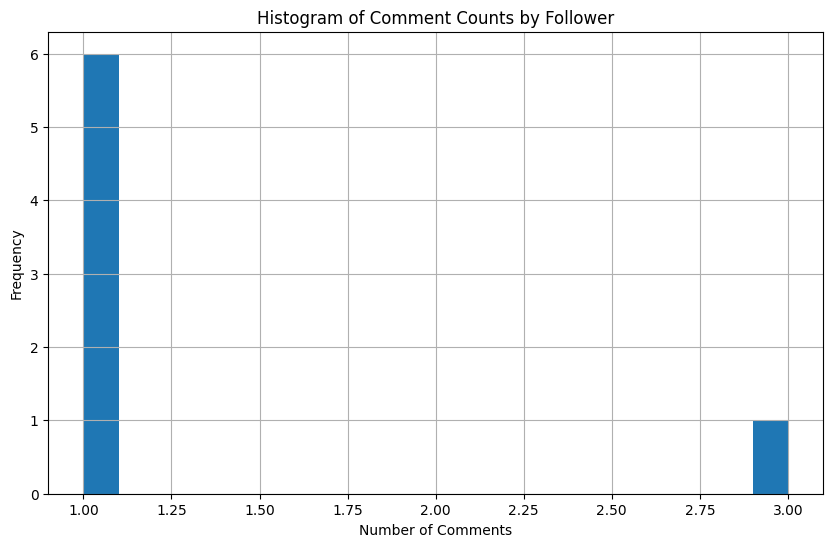

In [13]:
#Visualizations
#Histogram of Comment Counts:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
comment_counts['comment_count'].hist(bins=20)
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.title('Histogram of Comment Counts by Follower')
plt.show()


In [16]:
#Add the 'sentiment' Column Correctly

from textblob import TextBlob

# Make sure 'Comment Text' is the correct column name
merged_df['sentiment'] = merged_df['Comment Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Verify if the sentiment column is created
print(merged_df[['Comment Text', 'sentiment']].head())


    Comment Text  sentiment
0  informative 💯        0.0
1              💡        0.0
2           Bulb        0.0
3              🔥        0.0
4         ❤️❤️❤️        0.0


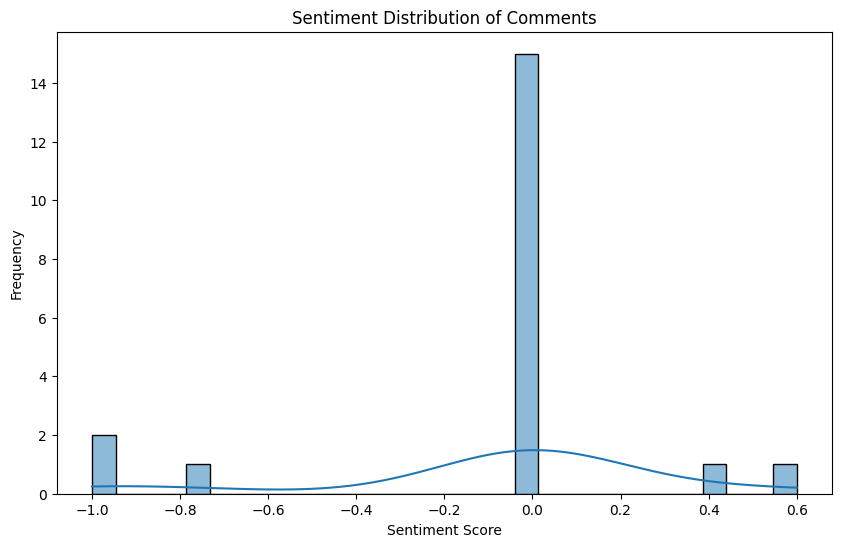

In [17]:
#Plot the Sentiment Distribution

#After confirming that the sentiment column exists, plot the data:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(merged_df['sentiment'], bins=30, kde=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution of Comments')
plt.show()


In [18]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import textblob
textblob.download_corpora()


AttributeError: module 'textblob' has no attribute 'download_corpora'

In [20]:
#Perform Sentiment Analysis
#using TextBlob to analyze the sentiment of each comment. TextBlob provides a polarity score that ranges from -1 (very negative) to 1 (very positive).

from textblob import TextBlob
import pandas as pd

# Load the data
followers_df = pd.read_csv(r'C:\Users\Sukanya Rane\OneDrive\Desktop\following.csv')
comments_df = pd.read_excel(r'C:\Users\Sukanya Rane\OneDrive\Desktop\comments.xlsx')

# Strip extra spaces from column names if necessary
followers_df.columns = followers_df.columns.str.strip()
comments_df.columns = comments_df.columns.str.strip()

# Merge the datasets on 'User Id'
merged_df = pd.merge(comments_df, followers_df, left_on='User Id', right_on='User Id', how='left')

# Perform sentiment analysis
merged_df['sentiment'] = merged_df['Comment Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the first few rows with sentiment
print(merged_df[['Fullname', 'Comment Text', 'sentiment']].head())

# Optional: Save results to a new Excel file
merged_df.to_excel(r'C:\Users\Sukanya Rane\OneDrive\Desktop\comments_with_sentiment.xlsx', index=False)


           Fullname   Comment Text  sentiment
0  Sneha Kudchadkar  informative 💯        0.0
1        Siya Desai              💡        0.0
2      Anushka Naik           Bulb        0.0
3            ShlokZ              🔥        0.0
4               NaN         ❤️❤️❤️        0.0


In [21]:
# Summary statistics
print(merged_df['sentiment'].describe())


count    20.000000
mean     -0.085625
std       0.395186
min      -1.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.600000
Name: sentiment, dtype: float64


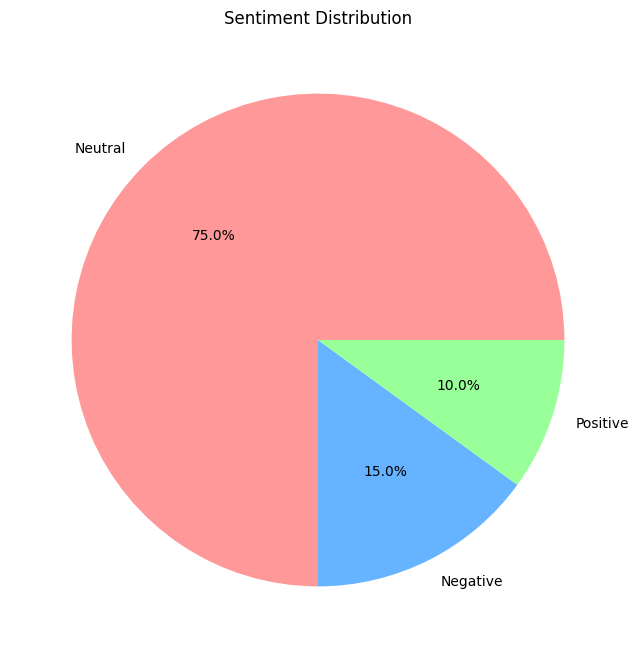

In [23]:
# Categorize sentiments
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

merged_df['sentiment_category'] = merged_df['sentiment'].apply(categorize_sentiment)

# Plot sentiment categories
plt.figure(figsize=(8, 8))
sentiment_counts = merged_df['sentiment_category'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sentiment Distribution')
plt.show()


In [24]:
#Frequency of Comments by Follower
#analyze how many comments each follower has made:


# Count the number of comments per follower
comment_counts = merged_df.groupby('Fullname').size().reset_index(name='comment_count')

# Display the top commenters
print(comment_counts.sort_values(by='comment_count', ascending=False).head())


           Fullname  comment_count
5  Sneha Kudchadkar              3
0      Anushka Naik              1
1   Saish Shirodkar              1
2            ShlokZ              1
3   Simran Nadkarni              1


In [25]:
#Most Common Words in Comments
#Identify the most frequently used words in comments to understand common themes:

from collections import Counter
import re

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove non-alphanumeric characters
    return text

# Apply preprocessing and combine all comments
all_comments = ' '.join(merged_df['Comment Text'].apply(preprocess_text))

# Tokenize and count words
word_counts = Counter(all_comments.split())

# Display the most common words
print(word_counts.most_common(10))


[('nice', 3), ('boring', 2), ('i', 2), ('informative', 1), ('bulb', 1), ('what', 1), ('disappointed', 1), ('unprofessional', 1), ('you', 1), ('re', 1)]


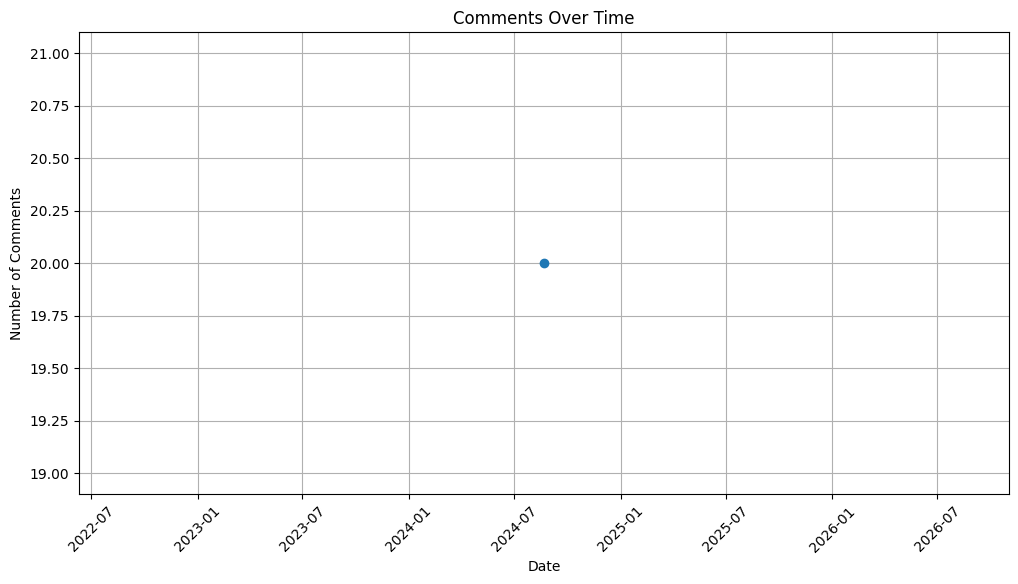

In [30]:
# Convert 'Date' column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')

# Extract date part
merged_df['Date'] = merged_df['Date'].dt.date

# Count comments by date
comments_by_date = merged_df.groupby('Date').size().reset_index(name='comment_count')

# Plot comments over time
plt.figure(figsize=(12, 6))
plt.plot(comments_by_date['Date'], comments_by_date['comment_count'], marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Comments Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


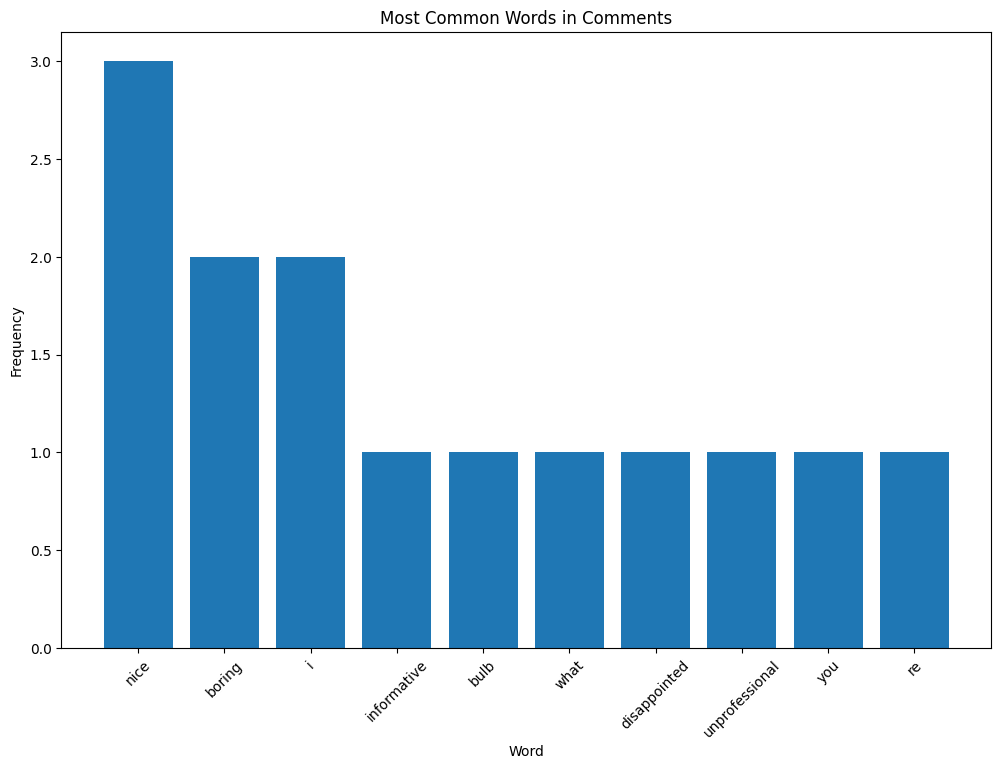

In [40]:
#MOST COMMON WORDS IN COMMENTS
#Purpose: Identify the most frequently used words in comments.


from collections import Counter
import re
import matplotlib.pyplot as plt

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove non-alphanumeric characters
    return text

# Apply preprocessing and combine all comments
all_comments = ' '.join(merged_df['Comment Text'].apply(preprocess_text))

# Tokenize and count words
word_counts = Counter(all_comments.split())

# Plot most common words
plt.figure(figsize=(12, 8))
most_common_words = dict(word_counts.most_common(10))
plt.bar(most_common_words.keys(), most_common_words.values())
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Common Words in Comments')
plt.xticks(rotation=45)
plt.show()


In [42]:


pip install textblob



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


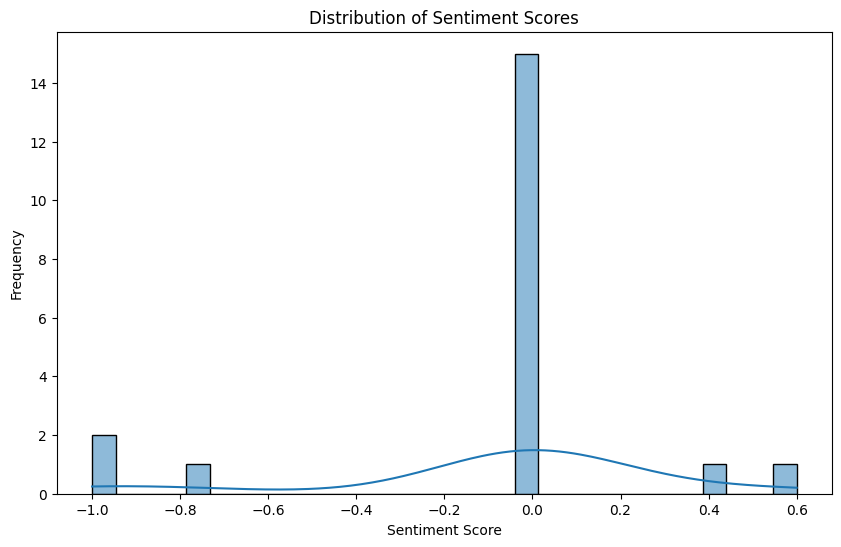

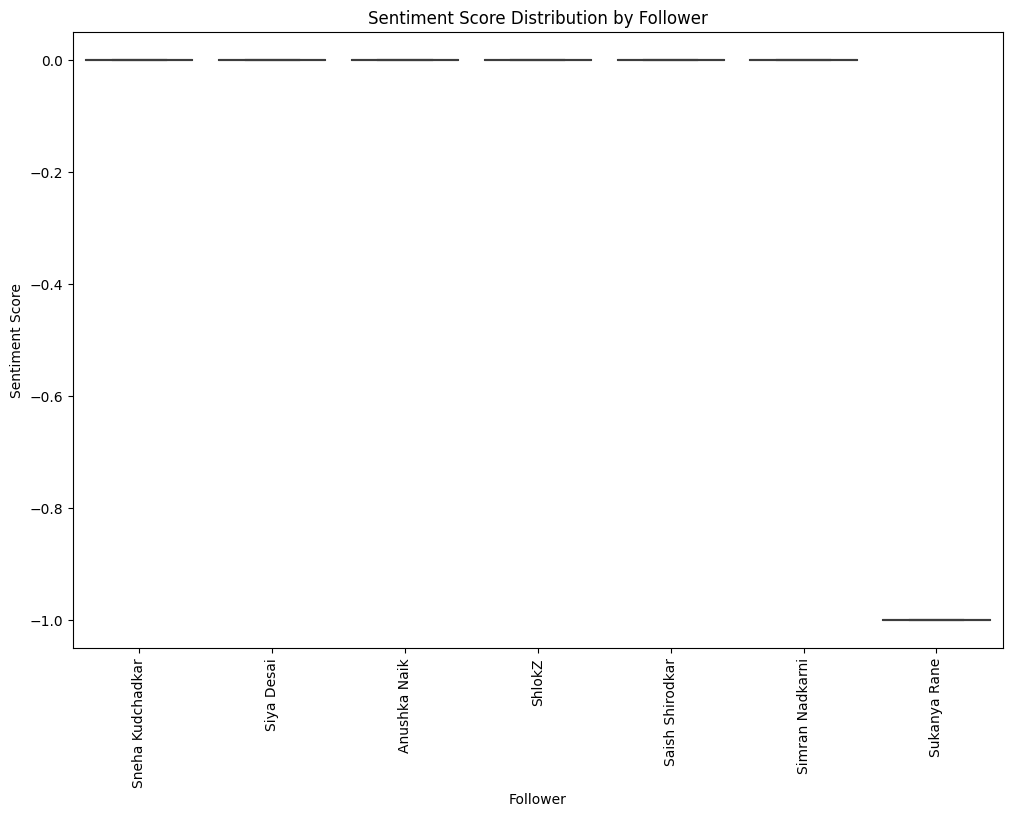

In [43]:
#Sentiment Analysis
#Purpose: Determine the sentiment of comments.
import seaborn as sns

# Add a sentiment column
merged_df['sentiment'] = merged_df['Comment Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['sentiment'], bins=30, kde=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

# Boxplot of sentiment scores by follower
plt.figure(figsize=(12, 8))
sns.boxplot(x='Fullname', y='sentiment', data=merged_df)
plt.xticks(rotation=90)
plt.xlabel('Follower')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Distribution by Follower')
plt.show()


from textblob import TextBlob
import seaborn as sns

# Add a sentiment column
merged_df['sentiment'] = merged_df['Comment Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['sentiment'], bins=30, kde=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

# Boxplot of sentiment scores by follower
plt.figure(figsize=(12, 8))
sns.boxplot(x='Fullname', y='sentiment', data=merged_df)
plt.xticks(rotation=90)
plt.xlabel('Follower')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Distribution by Follower')
plt.show()


In [45]:
# Print the columns of the merged DataFrame
print(merged_df.columns)


Index(['User Id', 'Username_x', 'Comment Id', 'Comment Text', 'Profile URL_x',
       'Avatar URL_x', 'Date', 'Username_y', 'Fullname', 'Followed by you',
       'Is verified', 'Profile URL_y', 'Avatar URL_y', 'sentiment'],
      dtype='object')


In [46]:
import pandas as pd

# Load the data
followers_df = pd.read_csv(r'C:\Users\Sukanya Rane\OneDrive\Desktop\following.csv')
comments_df = pd.read_excel(r'C:\Users\Sukanya Rane\OneDrive\Desktop\comments.xlsx')

# Strip any extra spaces from column names
followers_df.columns = followers_df.columns.str.strip()
comments_df.columns = comments_df.columns.str.strip()

# Merge the data
merged_df = pd.merge(comments_df, followers_df, left_on='User Id', right_on='User Id', how='left')

# Print the columns to check
print(merged_df.columns)


Index(['User Id', 'Username_x', 'Comment Id', 'Comment Text', 'Profile URL_x',
       'Avatar URL_x', 'Date', 'Username_y', 'Fullname', 'Followed by you',
       'Is verified', 'Profile URL_y', 'Avatar URL_y'],
      dtype='object')


In [47]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


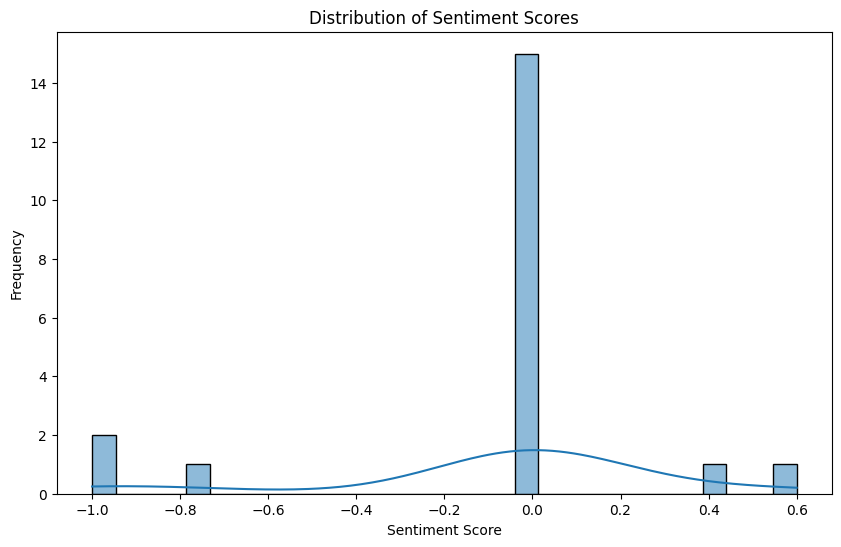

In [48]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Perform sentiment analysis
merged_df['sentiment'] = merged_df['Comment Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['sentiment'], bins=30, kde=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()


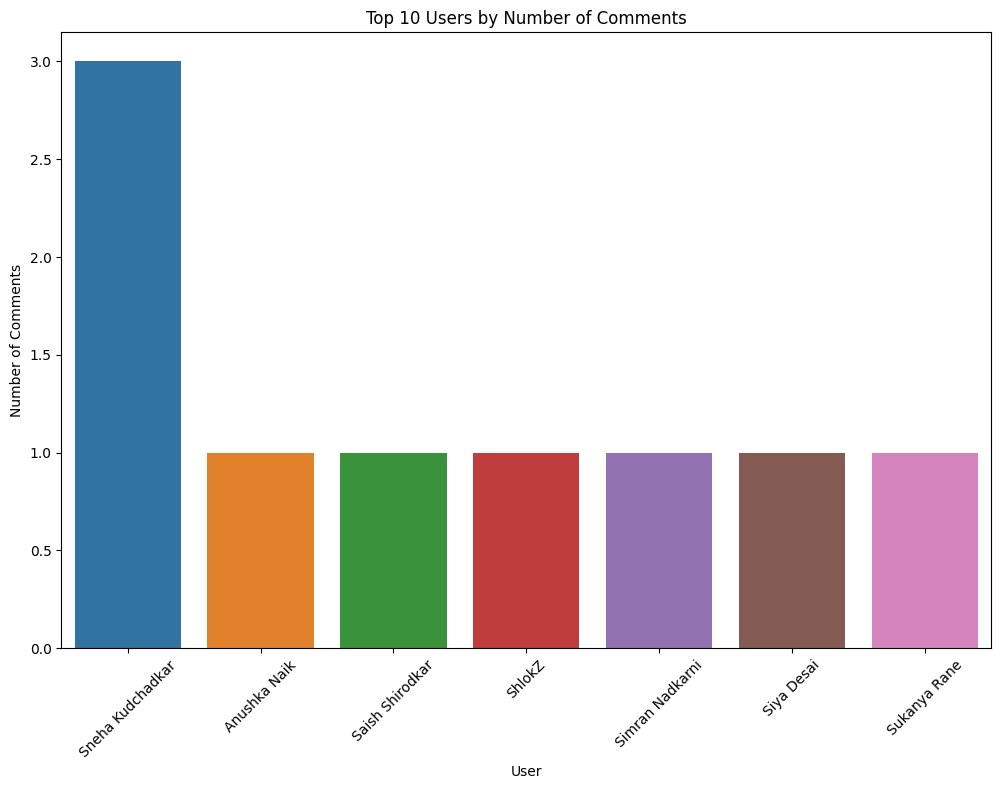

In [49]:
# Count the number of comments per user
comment_counts = merged_df.groupby('Fullname').size().reset_index(name='comment_count')

# Plot comment counts
plt.figure(figsize=(12, 8))
sns.barplot(data=comment_counts.sort_values(by='comment_count', ascending=False).head(10), x='Fullname', y='comment_count')
plt.xlabel('User')
plt.ylabel('Number of Comments')
plt.title('Top 10 Users by Number of Comments')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x800 with 0 Axes>

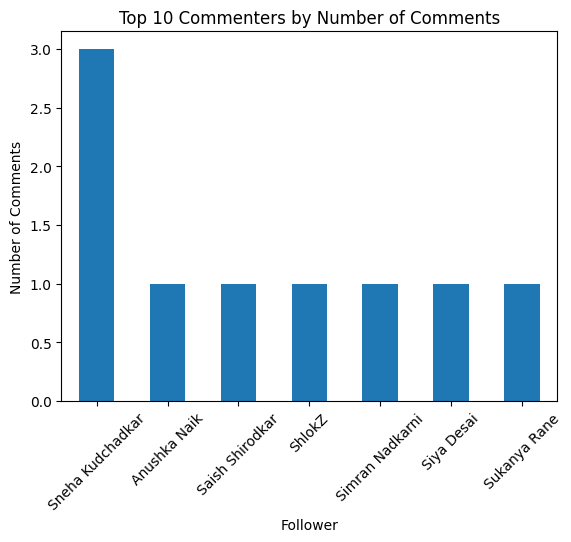

<Figure size 1200x800 with 0 Axes>

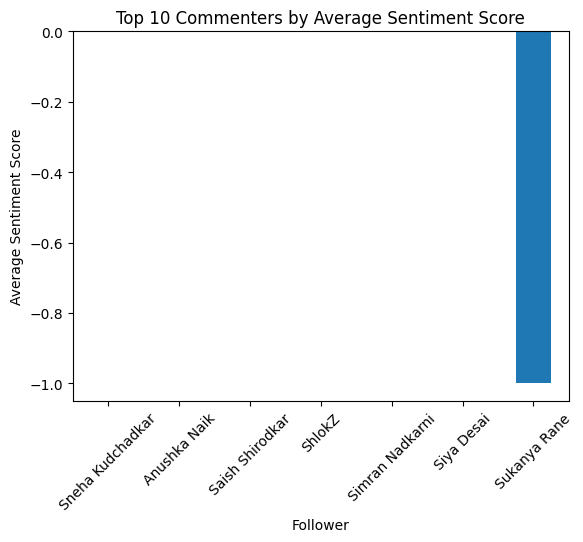

In [51]:
#Top Commenters and Their Sentiment
#Purpose: Combine the number of comments with sentiment analysis.


# Group by Fullname and calculate mean sentiment
top_commenters = merged_df.groupby('Fullname').agg({'sentiment': 'mean', 'Comment Text': 'count'}).reset_index()
top_commenters.rename(columns={'Comment Text': 'comment_count'}, inplace=True)

# Sort by the number of comments
top_commenters = top_commenters.sort_values(by='comment_count', ascending=False)

# Plot top commenters by comment count
plt.figure(figsize=(12, 8))
top_commenters.head(10).plot(kind='bar', x='Fullname', y='comment_count', legend=False)
plt.xlabel('Follower')
plt.ylabel('Number of Comments')
plt.title('Top 10 Commenters by Number of Comments')
plt.xticks(rotation=45)
plt.show()

# Plot average sentiment of top commenters
plt.figure(figsize=(12, 8))
top_commenters.head(10).plot(kind='bar', x='Fullname', y='sentiment', legend=False)
plt.xlabel('Follower')
plt.ylabel('Average Sentiment Score')
plt.title('Top 10 Commenters by Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()


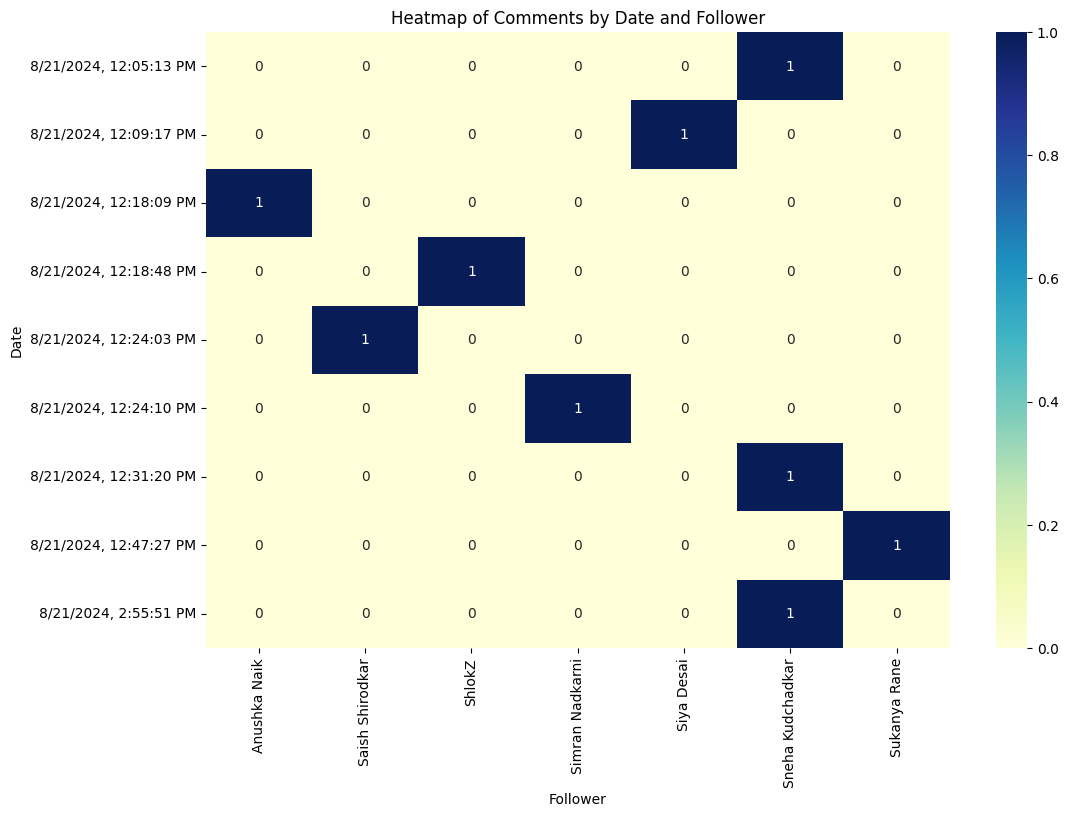

In [52]:
#Heatmap of Comments by Date and Follower
#Purpose: Visualize comments by date and follower.

import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table for heatmap
heatmap_data = merged_df.pivot_table(index='Date', columns='Fullname', values='Comment Text', aggfunc='count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Comments by Date and Follower')
plt.xlabel('Follower')
plt.ylabel('Date')
plt.show()


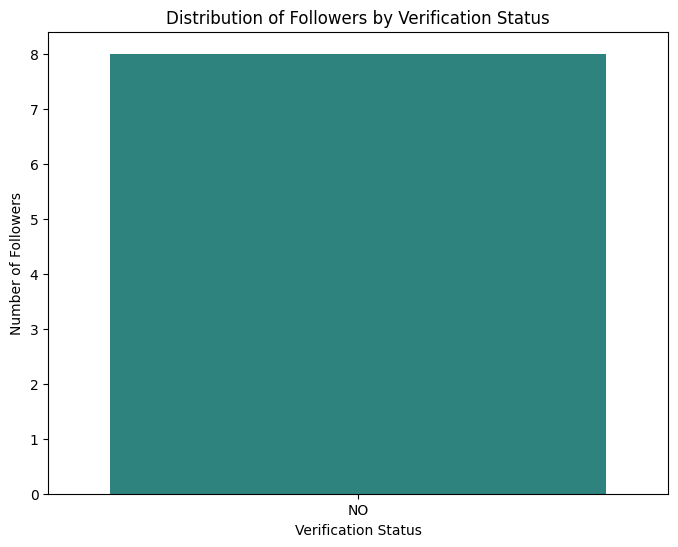

In [53]:
#Follower Distribution by Verification Status
#Visualize the distribution of followers based on their verification status.

import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of followers by verification status
verification_counts = followers_df['Is verified'].value_counts().reset_index()
verification_counts.columns = ['Verification Status', 'Count']

# Plot verification status distribution
plt.figure(figsize=(8, 6))
sns.barplot(data=verification_counts, x='Verification Status', y='Count', palette='viridis')
plt.xlabel('Verification Status')
plt.ylabel('Number of Followers')
plt.title('Distribution of Followers by Verification Status')
plt.show()


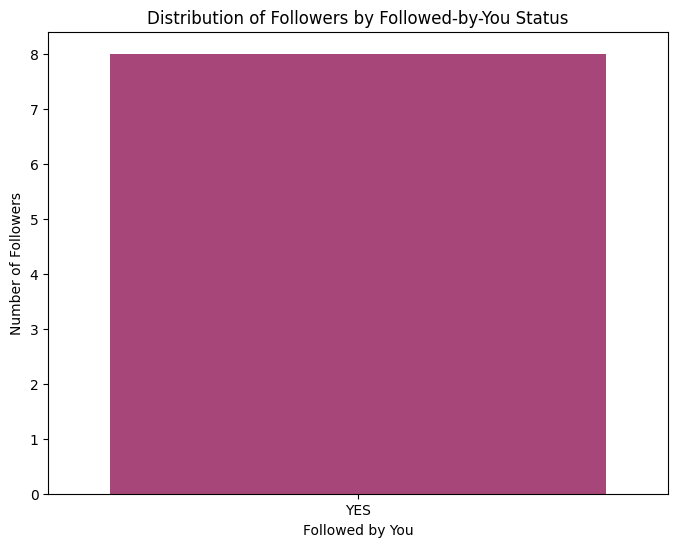

In [54]:
#Followers Distribution by Followed-by Status
#Visualize the distribution of followers based on whether they follow you back or not.

# Count the number of followers based on 'Followed by you' status
followed_by_you_counts = followers_df['Followed by you'].value_counts().reset_index()
followed_by_you_counts.columns = ['Followed by You', 'Count']

# Plot followed-by-you status distribution
plt.figure(figsize=(8, 6))
sns.barplot(data=followed_by_you_counts, x='Followed by You', y='Count', palette='magma')
plt.xlabel('Followed by You')
plt.ylabel('Number of Followers')
plt.title('Distribution of Followers by Followed-by-You Status')
plt.show()


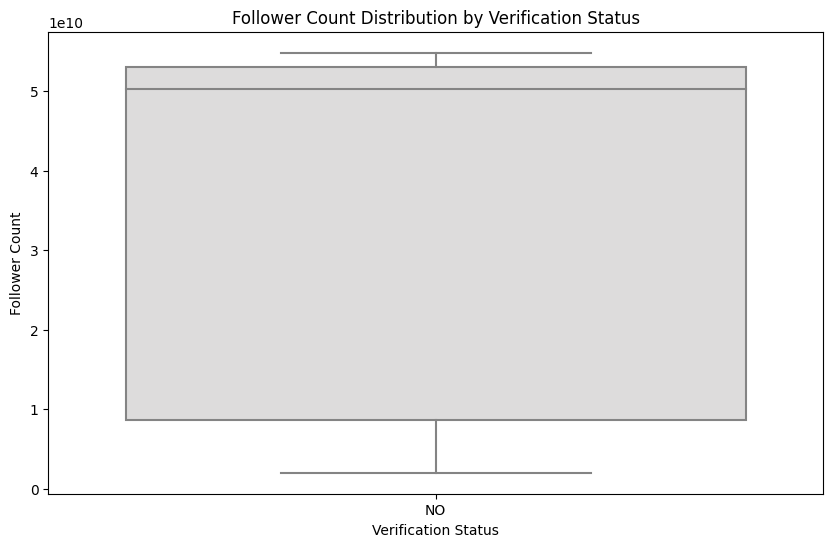

In [55]:
#Followers Count and Verification Status
#Analyze the relationship between the number of followers and their verification status.

# Extract follower counts and ensure it's numeric
followers_df['Follower Count'] = pd.to_numeric(followers_df['User Id'], errors='coerce')

# Plot follower count vs. verification status
plt.figure(figsize=(10, 6))
sns.boxplot(data=followers_df, x='Is verified', y='Follower Count', palette='coolwarm')
plt.xlabel('Verification Status')
plt.ylabel('Follower Count')
plt.title('Follower Count Distribution by Verification Status')
plt.show()


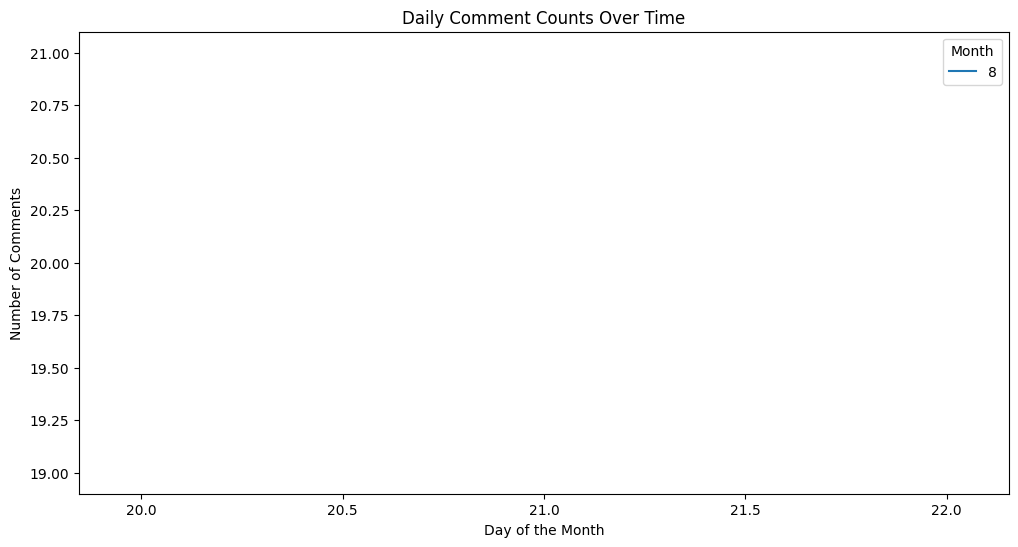

In [56]:
#Follower Activity Over Time
#If you have temporal data or posts from followers, analyze activity patterns over time. In this case, we don’t have temporal data in the followers_df, but if available, you could use it as follows:

# Assuming there's a 'Date' column in the comments data and you want to analyze activity over time
comments_df['Date'] = pd.to_datetime(comments_df['Date'])
comments_df['Day'] = comments_df['Date'].dt.day
comments_df['Month'] = comments_df['Date'].dt.month
comments_df['Year'] = comments_df['Date'].dt.year

# Count comments per day
daily_comments = comments_df.groupby(['Year', 'Month', 'Day']).size().reset_index(name='comment_count')

# Plot comments over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_comments, x='Day', y='comment_count', hue='Month', palette='tab10')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Comments')
plt.title('Daily Comment Counts Over Time')
plt.show()


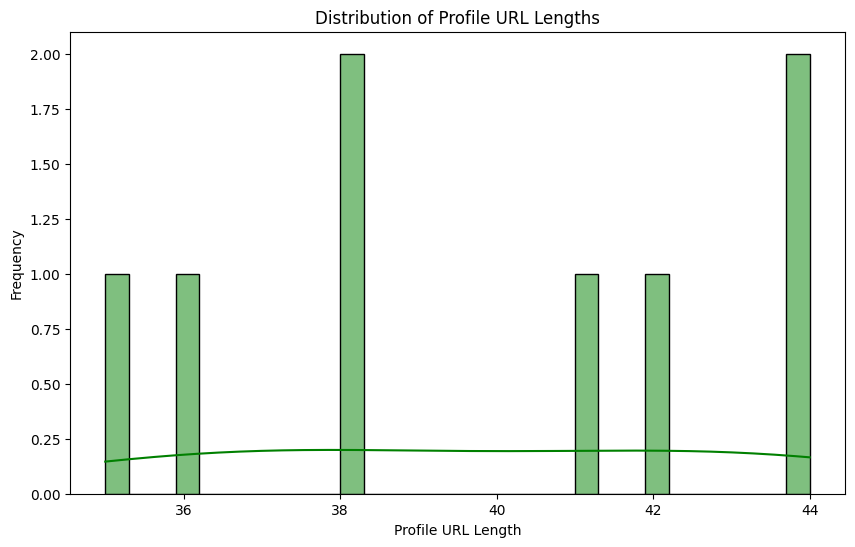

In [57]:
#Top Followers by Profile URL Length
#Analyze followers based on the length of their profile URLs (as a proxy for profile complexity).

# Calculate the length of each profile URL
followers_df['Profile URL Length'] = followers_df['Profile URL'].apply(len)

# Plot profile URL length distribution
plt.figure(figsize=(10, 6))
sns.histplot(followers_df['Profile URL Length'], bins=30, kde=True, color='green')
plt.xlabel('Profile URL Length')
plt.ylabel('Frequency')
plt.title('Distribution of Profile URL Lengths')
plt.show()


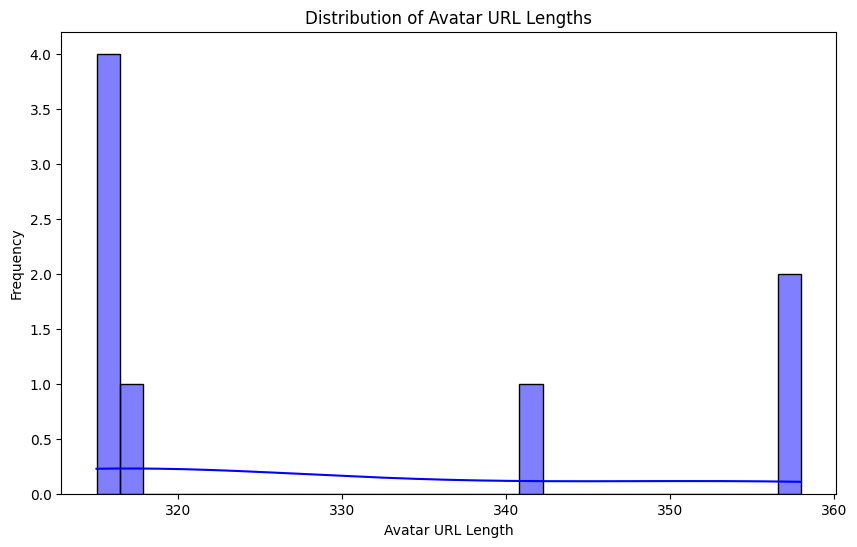

In [58]:
#Top Followers by Avatar URL Length
#Analyze followers based on the length of their avatar URLs.

# Calculate the length of each avatar URL
followers_df['Avatar URL Length'] = followers_df['Avatar URL'].apply(len)

# Plot avatar URL length distribution
plt.figure(figsize=(10, 6))
sns.histplot(followers_df['Avatar URL Length'], bins=30, kde=True, color='blue')
plt.xlabel('Avatar URL Length')
plt.ylabel('Frequency')
plt.title('Distribution of Avatar URL Lengths')
plt.show()


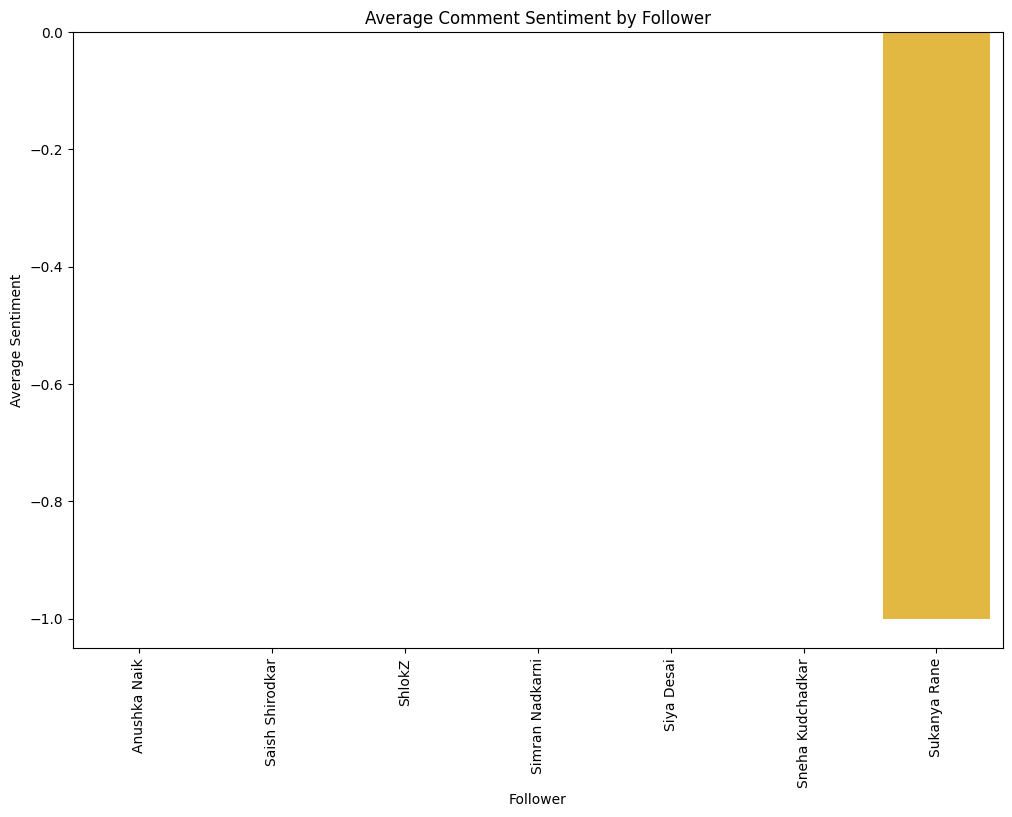

In [59]:
#Analysis of Comment Sentiment by Follower
#Examine how the sentiment of comments varies by follower.


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Assuming merged_df is already created
# Add sentiment column to comments data
comments_df['sentiment'] = comments_df['Comment Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Merge the data to associate comments with followers
merged_df = pd.merge(comments_df, followers_df, left_on='User Id', right_on='User Id', how='left')

# Analyze average sentiment per follower
avg_sentiment_per_follower = merged_df.groupby('Fullname')['sentiment'].mean().reset_index()

# Plot average sentiment by follower
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_sentiment_per_follower.sort_values(by='sentiment', ascending=False), x='Fullname', y='sentiment', palette='plasma')
plt.xticks(rotation=90)
plt.xlabel('Follower')
plt.ylabel('Average Sentiment')
plt.title('Average Comment Sentiment by Follower')
plt.show()


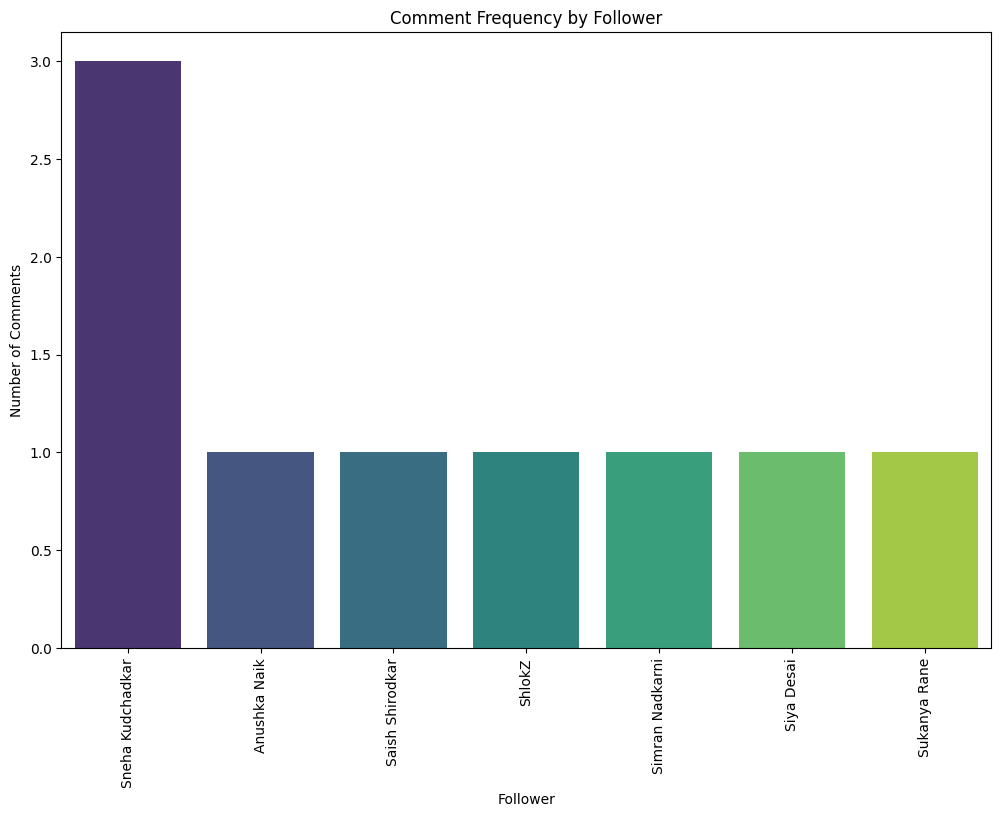

In [60]:
#Comment Frequency by Follower
#Analyze how frequently each follower comments.


# Count the number of comments per follower
comment_frequency = merged_df.groupby('Fullname').size().reset_index(name='comment_count')

# Plot comment frequency by follower
plt.figure(figsize=(12, 8))
sns.barplot(data=comment_frequency.sort_values(by='comment_count', ascending=False), x='Fullname', y='comment_count', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Follower')
plt.ylabel('Number of Comments')
plt.title('Comment Frequency by Follower')
plt.show()


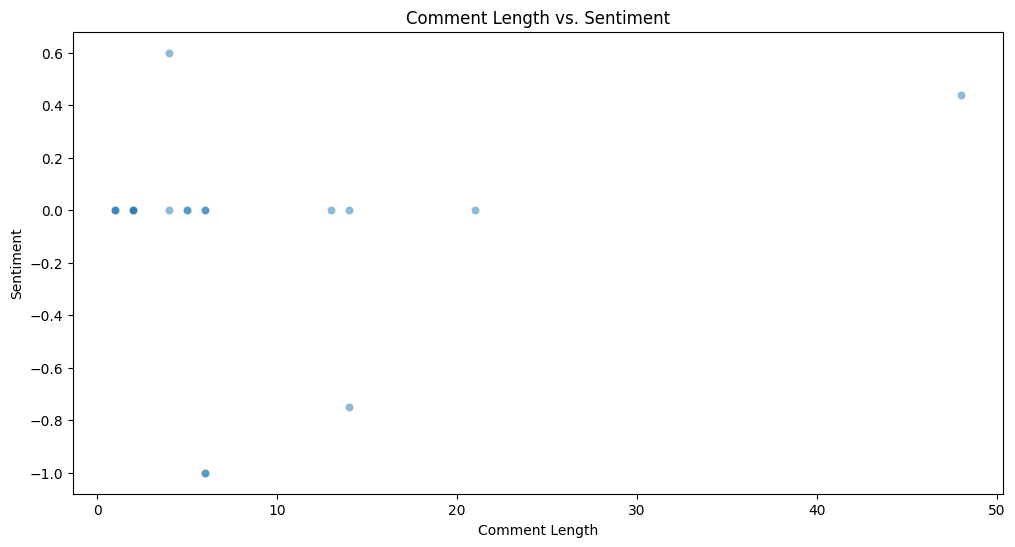

In [62]:
#Comment Length Analysis
#Analyze the distribution of comment lengths and their sentiments.

# Calculate the length of each comment
comments_df['Comment Length'] = comments_df['Comment Text'].apply(len)

# Plot comment length distribution with sentiment overlay
plt.figure(figsize=(12, 6))
sns.scatterplot(data=comments_df, x='Comment Length', y='sentiment', alpha=0.5)
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')
plt.title('Comment Length vs. Sentiment')
plt.show()
